In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

urlPlayer <- "https://raw.githubusercontent.com/aric-chan/dsci-100-2024w2-project-005-6/0dbc21753a915e3c1f35c50505f65622deecdc0d/players.csv"
urlSessions <- "https://raw.githubusercontent.com/aric-chan/dsci-100-2024w2-project-005-6/refs/heads/main/sessions.csv"
player_data <- read_csv(urlPlayer)
sessions_data <- read_csv(urlSessions)
# View the first few rows
head(player_data)
head(sessions_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [2]:
playerData <- player_data |> 
  filter(!is.na(Age)) |>  # Remove missing age
  mutate(
    age = Age,
    age_group = case_when(
      age <= 15 ~ "teen",      
      age > 15 & age <= 50 ~ "young adult",  
      age > 50 ~ "adult"
    )
  ) |>
  select(experience, age, age_group, played_hours)

# Convert 'experience' ordered factor and numeric
playerData <- playerData |> 
  mutate(
    experience = factor(experience, 
                        levels = c("Beginner", "Regular", "Amateur", "Veteran", "Pro"),  
                        ordered = TRUE),
    experience_num = as.numeric(experience)  # Convert to numeric
  )

# Convert 'age_group' to an ordered factor and numeric
playerData <- playerData |> 
  mutate(
    age_group = factor(age_group, 
                       levels = c("teen", "young adult", "adult"),  
                       ordered = TRUE),
    age_num = as.numeric(age_group)  # Convert to numeric
  )

head(playerData)

experience,age,age_group,played_hours,experience_num,age_num
<ord>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>
Pro,9,teen,30.3,5,1
Veteran,17,young adult,3.8,4,2
Veteran,17,young adult,0.0,4,2
Amateur,21,young adult,0.7,3,2
Regular,21,young adult,0.1,2,2
Amateur,17,young adult,0.0,3,2


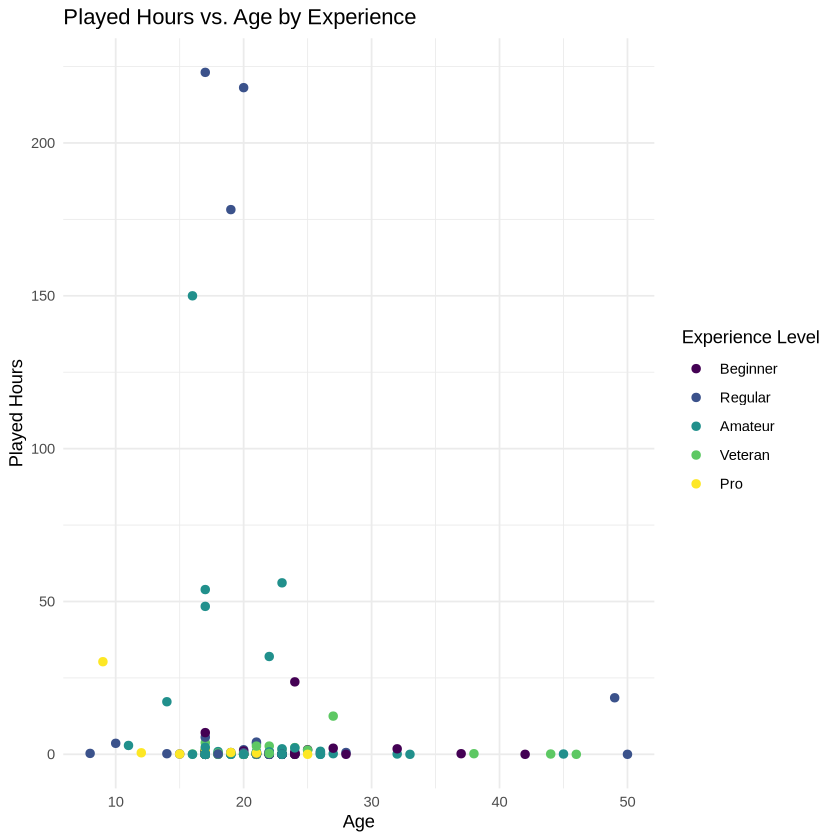

In [3]:
ggplot(playerData, aes(x = age, y = played_hours, color = experience)) +
  geom_point(size = 2) +
  labs(x = "Age", y = "Played Hours", color = "Experience Level", title = "Figure 1 Played Hours vs. Age by Experience") +
  theme_minimal()

In [4]:
#split training test
set.seed(123)  
data_split <- initial_split(playerData, prop = 0.7)  # 70% training, 30% testing
train_data <- training(data_split)
test_data  <- testing(data_split)
test_data <- test_data %>% drop_na(age)

In [5]:
#1 recipe with experience 
recipe_exp <- recipe(played_hours ~ experience_num, data = train_data)

#2 recipe with age
recipe_age <- recipe(played_hours ~ age, data = train_data) |>
              step_normalize(age)

#3 recipe with experience and age (no discretization)
recipe_age_exp <- recipe(played_hours ~ age + experience_num, data = train_data) |>
                  step_normalize(age)

#4 recipe with experience and age group
recipe_age_gp_exp <- recipe(played_hours ~ age_num + experience_num, data = train_data)


In [6]:
reg_model <- linear_reg() %>%
  set_engine("lm") 

In [7]:
# 1 experience workflow
workflow_exp <- workflow() %>%
  add_recipe(recipe_exp) %>%
  add_model(reg_model)

# 2 age workflow
workflow_age <- workflow() %>%
  add_recipe(recipe_age) %>%
  add_model(reg_model)

# 3 experience and age workflow
workflow_age_exp <- workflow() %>%
  add_recipe(recipe_age_exp) %>%
  add_model(reg_model)

# 4 experience and age group workflow
workflow_age_gp_exp <- workflow() %>%
  add_recipe(recipe_age_gp_exp) %>%
  add_model(reg_model)


In [8]:
#1 experience fit
fitted_exp <- fit(workflow_exp, data = train_data)

#2 age fit
fitted_age <- fit(workflow_age, data = train_data)

#3 experience and age fit
fitted_age_exp <- fit(workflow_age_exp, data = train_data)

#4 experience and age group fit
fitted_age_gp_exp <- fit(workflow_age_gp_exp, data = train_data)

In [9]:
# Extract coefficients for the experience model 
exp_fit <- fitted_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience Model (experience_num):\n")
print(coef(exp_fit))

# Extract coefficients for the age model 
age_fit <- fitted_age |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Age Model (age):\n")
print(coef(age_fit))

# Extract coefficients for the experience and age model 
age_exp_fit <- fitted_age_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience and Age Model (experience_num + age normalized):\n")
print(coef(age_exp_fit))

# Extract coefficients for the experience and age group model 
age_gp_exp_fit <- fitted_age_gp_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience and Age group Model (experience_num + age_num):\n")
print(coef(age_gp_exp_fit))

Coefficients for Experience Model (experience_num):
   (Intercept) experience_num 
      8.617772      -1.251091 
Coefficients for Age Model (age):
(Intercept)         age 
   5.225926   -1.465311 
Coefficients for Experience and Age Model (experience_num + age normalized):
   (Intercept)            age experience_num 
      8.949421      -1.622726      -1.373420 
Coefficients for Experience and Age group Model (experience_num + age_num):
   (Intercept)        age_num experience_num 
     -1.550496       5.155171      -1.247155 


In [11]:
#1 experience
test_data_exp <- test_data %>% drop_na(age)
predict_exp <- predict(fitted_exp, new_data = test_data_exp) %>%
  bind_cols(test_data_exp)  

# #2 age
test_data_age <- test_data %>% drop_na(age)
predict_age <- predict(fitted_age, new_data = test_data) %>%
  bind_cols(test_data_age)  

# #3 experience and age
test_data_exp_age <- test_data %>% drop_na(age)
predict_exp_age <- predict(fitted_age_exp, new_data = test_data) %>%
  bind_cols(test_data_exp_age)  

# #4 experience and age group
test_data_exp_age_gp <- test_data %>% drop_na(age)
predict_exp_age_gp <- predict(fitted_age_gp_exp, new_data = test_data) %>%
  bind_cols(test_data_exp_age_gp)  

In [12]:
# 1 metric as exp
metrics_exp <- predict_exp %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp)  

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     30.2   
2 rsq     standard      0.0182
3 mae     standard      9.90  


In [13]:
# 2 metric as age  
metrics_age <- predict_age %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_age)  

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard    30.2    
2 rsq     standard     0.00421
3 mae     standard    10.5    


In [14]:
# 3 metric as experience and age 
metrics_exp_age <- predict_exp_age %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp_age) 

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     30.1   
2 rsq     standard      0.0167
3 mae     standard     10.2   


In [15]:
# 4 metric as experience and age group 
metrics_exp_age_gp <- predict_exp_age_gp %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp_age_gp) 

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard    30.3    
2 rsq     standard     0.00340
3 mae     standard    10.2    


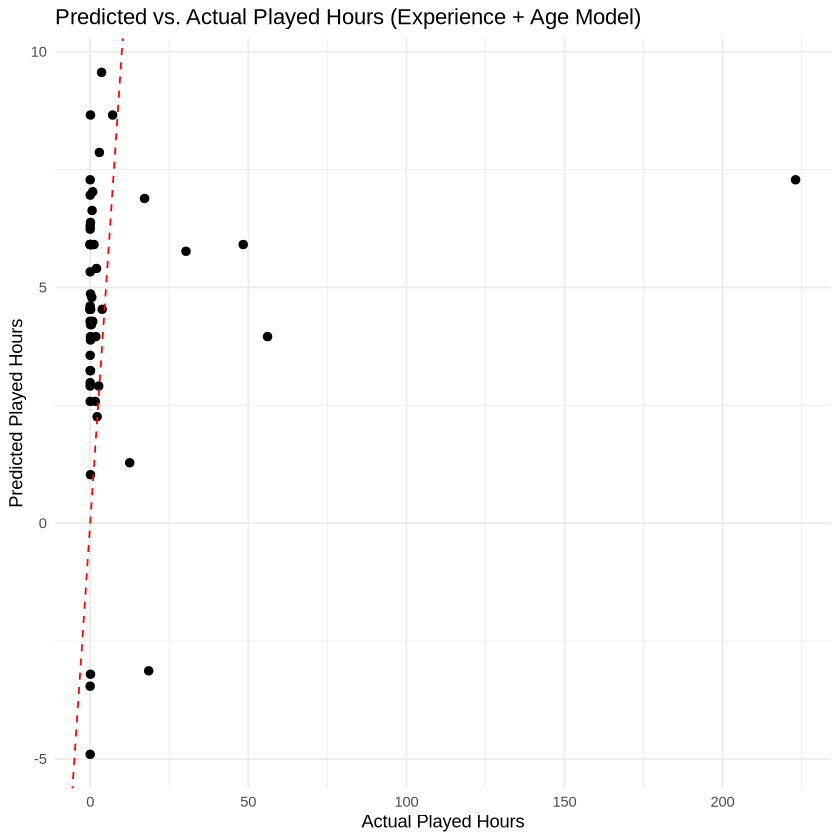

In [18]:
# plot the actual vs predict with highest R
ggplot(predict_exp_age, aes(x = played_hours, y = .pred)) +
  geom_point(size = 2) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Actual Played Hours", y = "Predicted Played Hours", 
       title = "Figure 2 Predicted vs. Actual Played Hours (Experience + Age Model)") +
  theme_minimal()